<a href="https://colab.research.google.com/github/elvingeorgee/Autoboxing/blob/main/Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Supervised has labels and unsupervised doesn't have any labels 
import pandas as pd

In [ ]:
df = pd.read_csv("https://gist.githubusercontent.com/frankbruni/27f12f10e04e718f60f094020c2ef159/raw/c5a6aff7f444c8d0be98e219c576a438d459f63d/FantasyPros_2021_Overall_NBA_Rankings.csv")
df.head()

,Rank,Player,Team,Positions,Best,Worst,Avg,Std Dev
0,1,Nikola Jokic,DEN,"PF,C DTD",1,3,1.2,0.6
1,2,Stephen Curry,GSW,"PG,SG DTD",1,5,2.5,0.9
2,3,James Harden,PHI,"PG,SG",2,6,3.1,1.1
3,4,Luka Doncic,DAL,"PG,SG DTD",1,17,5.8,4.2
4,5,Damian Lillard,POR,PG OUT,4,14,6.6,2.6


In [ ]:
df.shape

(342, 8)

In [ ]:
num_teams = 12
num_roster_spots = 13

draft_pool = num_teams * num_roster_spots

In [ ]:
draft_pool

156

In [ ]:
df = df[:draft_pool]

In [ ]:
df.shape

(156, 8)

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns; sns.set_style('whitegrid');

In [ ]:
start = 4
stop = 29
avg = []

for n_cluster in range(start, stop): 
  X = df[['Avg']].values

  model = KMeans(n_clusters = n_cluster)
  model.fit(X)
  labels = model.predict(X)
  silhouette_avg = silhouette_score(X, labels)
  avg.append(silhouette_avg)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [ ]:
avg

[0.5848706804115518,
 0.5726407093385608,
 0.5739147614212532,
 0.5762024758837766,
 0.5464308781778704,
 0.5581949412662692,
 0.5678164808296888,
 0.5811437237469791,
 0.5725338275194414,
 0.5666514122390507,
 0.5649475614215754,
 0.5593790288871776,
 0.5408053305980914,
 0.5417831407123799,
 0.5398091023585067,
 0.5229079883533304,
 0.5349640678384449,
 0.5596386947867595,
 0.5520638710916598,
 0.5580821192563797,
 0.5579554735251967,
 0.5418616367544956,
 0.5731503662191557,
 0.5788531638948043,
 0.5994148796984609]

(0.0, 1.0)

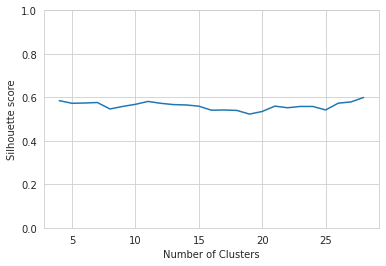

In [ ]:
plt.plot(np.arange(start, stop, 1), avg)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette score')

plt.ylim(0, 1)

In [ ]:
k = 25
model = KMeans(n_clusters = k)
model.fit(df[['Avg']].values)
labels = model.predict(df[['Avg']].values)

def assign_tiers(labels):
  unique_labels = []
  tiers = []
  for i in labels: 
    if i not in unique_labels:
      unique_labels.append(i)
    tiers.append(len(set(unique_labels)))
  return tiers

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels

array([13, 13, 13, 13, 13, 13, 13, 13, 13,  3,  3,  3,  3, 17, 17, 17, 17,
       17, 17, 17, 17, 17,  6,  6,  6,  6, 18, 18, 18, 18, 16, 16, 16, 16,
       16, 16,  1,  1,  1,  1,  1,  1,  1, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15,  9,  9,  9,  9,  9,  9,  9,  5,  5,  5,  5,  5, 22,  9, 11,
        9,  2,  5,  2,  5, 22, 22, 22, 22, 11, 11, 11, 11, 11,  2, 10,  2,
        2,  2, 10, 20, 20, 20, 20, 20, 10, 10, 10, 10, 10, 10,  7,  7,  7,
       14, 14, 14, 14, 14, 14, 14, 21, 21, 21, 21, 21,  0,  0,  0,  0, 19,
       19, 19, 19, 19, 14,  8,  8,  8,  8,  8, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 12, 12, 12, 12, 12,  4,  4,  4,  4,  4,  4,  4, 24, 24, 24,
       24, 24, 12], dtype=int32)

In [ ]:
tiers = assign_tiers(labels)


In [ ]:
df['Tier'].value_counts()

4    39
5    34
1    30
2    30
3    23
Name: Tier, dtype: int64

In [ ]:
tiers

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 18,
 19,
 19,
 19,
 19,
 20,
 20,
 20,
 20,
 20,
 20,
 21,
 21,
 21,
 21,
 21,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 23,
 23,
 23,
 23,
 23,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 25,
 25,
 25,
 25,
 25,
 25]

In [ ]:
df['Tier'] = tiers

In [ ]:
df.head(40)

,Rank,Player,Team,Positions,Best,Worst,Avg,Std Dev,Tier
0,1,Nikola Jokic,DEN,"PF,C DTD",1,3,1.2,0.6,1
1,2,Stephen Curry,GSW,"PG,SG DTD",1,5,2.5,0.9,1
2,3,James Harden,PHI,"PG,SG",2,6,3.1,1.1,1
3,4,Luka Doncic,DAL,"PG,SG DTD",1,17,5.8,4.2,1
4,5,Damian Lillard,POR,PG OUT,4,14,6.6,2.6,1
5,6,Karl-Anthony Towns,MIN,C DTD,4,15,6.9,2.9,1
6,7,Giannis Antetokounmpo,MIL,"PF,C DTD",4,12,7.1,2.4,1
7,8,Kevin Durant,BKN,"SF,PF",4,16,8.0,3.4,1
8,9,Jayson Tatum,BOS,"SF,PF DTD",5,12,8.3,2.2,1
9,10,Joel Embiid,PHI,"PF,C DTD",4,16,9.7,2.8,2
